
# CASE STUDY - convolutional neural networks

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import csv
import joblib
import time
from collections import Counter
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA


  1. Environment setup
  2. Model scaffolding using Keras
  3. Logging and Model serialization
  4. Model iteration

## Fashion MNIST

A solid benchmark dataset for this task is the Fashion MNIST dataset.  

* training set - 60,000 images
* test set - 10,000 images
* images are 28 pixels x 28 pixels
* classes: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot

In [4]:
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
print(tf.__version__)

## check hardware availability
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.10.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12894454398377139619
xla_global_id: -1
]


In [5]:
### load the data  
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)

## Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

X_train = train_images
X_test = test_images
y_train = train_labels
y_test = test_labels

Visualize a sample of the images to QA the data set (plot one image of each class). Then, print a summary of the data.

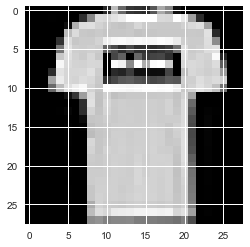

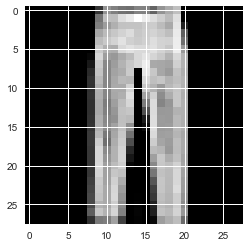

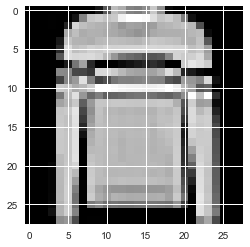

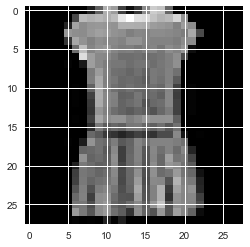

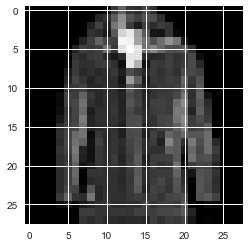

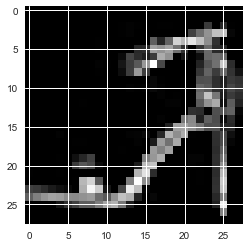

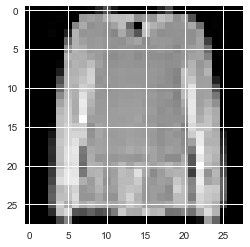

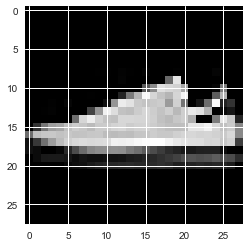

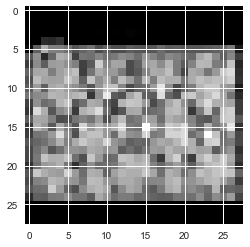

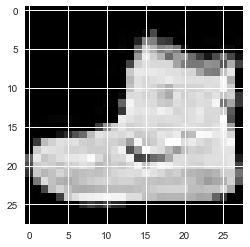

In [6]:
# plot the sample
for i in range(10):
    image = X_train[y_train == i][0]
    #images.append(im)
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
## YOUR CODE HERE (Summarize the data)
#lens = []
#for i in range(10):
#    len_ = X_train[y_train == i].shape[0]
#    lens.append(len_)
lens = [X_train[y_train == i].shape[0] for i in range(10)]
lens

[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

Build a base model. The base model that we want to build is composed of a PCA model followed by a classic machine learning classifier. 

In [11]:
## YOUR CODE HERE (Replace the symbole #<> with your code)
from sklearn.linear_model import SGDClassifier
# First we flatten the images to have a data shape that can be ingested by the PCA model.
# Take a moment to understand what does this function (flatten()) do to the images 
# and why this step is necessary.
X_train_flat = np.array([i.flatten() for i in train_images])
X_test_flat = np.array([i.flatten() for i in test_images])

pca = PCA(n_components = 2, random_state =0)
estimator = SGDClassifier(loss = 'log_loss')

pipe = Pipeline([('pca', pca),
                 ('clf', estimator)])

# Add the hyper-parameters that you want to optimize during your training
param_grid = {
    'clf__penalty':['l2','l1'],
    'clf__alpha':np.linspace(0.001, 0.1, 10)
}

## we create a "saved" folder to save the trained model. 
if not os.path.isdir("saved"):
    os.mkdir("saved")

saved_model_filename = os.path.join("saved", 'ml-model.joblib')
if not os.path.exists("saved_model"):
    time_start = time.time()
    
    grid = GridSearchCV(pipe, param_grid = param_grid)
    grid.fit(X_train.reshape(60000, 784), y_train)
        
    print("saving the pipeline")
    joblib.dump(grid, saved_model_filename)
    print("train time", time.strftime('%H:%M:%S', time.gmtime(time.time()-time_start)))
else:
    print("loading {} from file".format(saved_model_filename))
    grid = joblib.load(saved_model_filename)
    

saving the pipeline
train time 00:04:34


In [12]:
grid.best_params_

{'clf__alpha': 0.023000000000000003, 'clf__penalty': 'l2'}

In [13]:
## YOUR CODE HERE (Replace the symbole #<> with your code)
# Evaluate your model using the classification_report() function
y_pred = grid.predict(X_test.reshape(10000, 784))
    
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.50      0.55      0.52      1000
           1       0.70      0.85      0.77      1000
           2       0.27      0.07      0.11      1000
           3       0.44      0.36      0.40      1000
           4       0.37      0.62      0.46      1000
           5       0.48      0.71      0.57      1000
           6       0.28      0.25      0.27      1000
           7       0.58      0.38      0.46      1000
           8       0.51      0.44      0.48      1000
           9       0.59      0.61      0.60      1000

    accuracy                           0.48     10000
   macro avg       0.47      0.48      0.46     10000
weighted avg       0.47      0.48      0.46     10000



## PART 2 -  model scaffolding using Keras

Create a function that returns a model using ``keras.models.Sequential()`` and ensure that you pass ``activation_function`` as an argument.  Instaintiate a version of the model and print the summary.  This function is just meant to return a simple multilayer perceptron network.


In this question you are asked to build a function that created a simple multilayer perceptron network.

https://keras.io/api/models/sequential/

https://keras.io/api/layers/


In [16]:
## YOUR CODE HERE (Replace the symbole #<> with your code)

def build_mlp(activation_fn):
    """
    This Function creates a simple Dense (or multilayer perceptron) network.
    """
    
    # Initialize the Sequential object
    model = keras.Sequential()
    # add a Flatten layer to the sequence
    model.add(keras.layers.Flatten())
    # add a Dense layer to the sequence
    tf.keras.layers.Dense(512, activation=activation_fn), 
    # add the last dense layer to the sequence. Because this is the output layer, 
    # the output dimension should be equal to the number of class that your want to predict.
    model.add(keras.layers.Dense(10, activation='softmax'))    
    #model.compile(optimizer='Adam',
    #            loss='categorical_crossentropy',
    #            metrics = ['accuracy']) 
    return model

model_simple = build_mlp(activation_fn='relu')
model_simple.build(input_shape=(60000, 28,28))
model_simple.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (60000, 784)              0         
                                                                 
 dense_5 (Dense)             (60000, 10)               7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________



Create another version of neural network.  This time build a proper CNN.  

In [18]:
## YOUR CODE HERE


def build_cnn(activation_fn):
    """
    This function creates a convolutional neural network (cnn)
    """
    
    # Initialize the Sequential object
    model = keras.Sequential()
    
    #Add a CNN2D layer. Because this is the first layer, you have to specify the input shape for this layer.
    # (Hint : the input shape is (28, 28, 1) for black and white images of size 28x28)
    model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1))),
    model.add(tf.keras.layers.MaxPooling2D(2,2)),
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu')),
    model.add(tf.keras.layers.MaxPooling2D(2,2)), 
    #Add a Maxpooling layer
    #<>
    #Add a CNN2D layer
    #<>
    #Add a Maxpooling layer
    #<>
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation=activation_fn))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model 


model = build_cnn(activation_fn='relu')
model.build(input_shape=(60000, 28,28))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

## PART 3 - logging and Model serialization

You can use a trained model without having to retrain it.  Your can also continue training a model to pick-up training where you left off.  The `tf.keras.callbacks.ModelCheckpoint` callback allows to continually save the model both during and at the end of training.  For long running models this is ideal in case the training is interrupted.  Otherwise you can 
used `model.save()` and `model.load()`.  In this part you will create a function that accomplished a few things at once. 

In this question we will create a function that intend to :

1. save your models so that each iteration only needs to be run once
2. save the specifics of your model in a log file 

  * optimizer 
  * loss_fn 
  * test_loss
  * test_accuracy
  * any notes

In [38]:
## YOUR CODE HERE

def train_network(model_name, model, loss_fn, X_train, y_train, X_test, y_test, optimizer='adam'):
    """
    This function compiles, trains and saves the keras model
    Input : 
        - model_name : the name of the model (we will save the model under this name)
        - model : The keras Sequential model
        - loss_fn : the name of the loss function used to train the model (https://keras.io/api/losses/)
        - opitmizer : the name of the optimizer used to train the model (https://keras.io/api/optimizers/)
        - X_train : the training data
        - y_train : the training labels
        - X_test : the test data
        - y_test : the test labels
    """

    # First we create a filename for the model joining its name with the "saved" directory
    save_dir = 'saved'
    if not os.path.isdir(save_dir):
        os.mkdir(save_dir)
    saved_model = os.path.join(save_dir, "{}.h5".format(model_name))

    ## if the model has not been trained, we compile it, train it and save it
    if not os.path.exists(saved_model):
        ## compile model using the compile method of the keras.models.Sequential class
        #<>
        model.compile(optimizer=optimizer,
                loss=loss_fn,
                metrics = ['accuracy']) 
        ## fit the model using the fit method of the keras.models.Sequential class
        ## (choose 10 epochs and batch size of 64)
        #<>
        history = model.fit(X_train,y_train,
                    epochs=10,
                    batch_size = 64,
                    validation_data=(X_test, y_test))
        # Save the model
        model.save(saved_model)

        ## evaluate the model 
        test_loss, test_acc = history.history['val_loss'], history.history['val_accuracy']
        
        ## save a log file
        log_file = os.path.join(save_dir,"{}.log".format(model_name)) 
        with open(log_file, 'w') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(["loss_function", loss_fn])
            writer.writerow(["optimizer", optimizer])
            writer.writerow(["test_loss", test_loss])
            writer.writerow(["test_acc", test_acc])

    # if the model has already been trained we load it.
    else:
        print("... loading saved model")
        model = keras.models.load_model(saved_model)
                    
    return model

## PART 4 - model iteration


Use the functions created in the previous questions to build the model and train it on the MNIST dataset.

In [36]:
## YOUR CODE HERE (build and train a mulitlayer perception classifier)
train_network('multilayer_perc_clf', model_simple, 'sparse_categorical_crossentropy', X_train, y_train, X_test, y_test)

... loading saved model


In [39]:
## YOUR CODE HERE (build and train a CNN)


## For the CNN we have to add a third dimension to each sample image. 
## This dimension is called channel and is expected by the CNN2D layer. 
## Here the channel value is 1 because we have black and white images. 
## We would have to set this value to 3 for colored images.
X_train_1 = np.expand_dims(X_train, -1)
X_test_1 = np.expand_dims(X_test, -1)
train_network('cnn', model, 'sparse_categorical_crossentropy', X_train_1, y_train, X_test_1, y_test)

Epoch 1/10
938/938 [==============================] - 22s 22ms/step - loss: 0.1926 - accuracy: 0.9290 - val_loss: 0.2644 - val_accuracy: 0.9090
Epoch 2/10
938/938 [==============================] - 19s 21ms/step - loss: 0.1830 - accuracy: 0.9322 - val_loss: 0.2678 - val_accuracy: 0.9080
Epoch 3/10
938/938 [==============================] - 21s 22ms/step - loss: 0.1760 - accuracy: 0.9343 - val_loss: 0.2606 - val_accuracy: 0.9068
Epoch 4/10
938/938 [==============================] - 21s 23ms/step - loss: 0.1668 - accuracy: 0.9387 - val_loss: 0.2766 - val_accuracy: 0.9029
Epoch 5/10
938/938 [==============================] - 21s 22ms/step - loss: 0.1600 - accuracy: 0.9411 - val_loss: 0.2706 - val_accuracy: 0.9063
Epoch 6/10
938/938 [==============================] - 21s 23ms/step - loss: 0.1519 - accuracy: 0.9441 - val_loss: 0.2665 - val_accuracy: 0.9101
Epoch 7/10
938/938 [==============================] - 22s 23ms/step - loss: 0.1458 - accuracy: 0.9457 - val_loss: 0.2709 - val_accuracy: